# Tarea 2: Derivación numérica

Fecha de envío del PR inicial: **martes 14 de marzo**

Fecha de aceptación del PR: **lunes 20 de marzo**

## Ejercicio 1: Derivada *derecha*

(a) Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la aproximación de la derivada, que se basa en su definición:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

lo que requiere la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

(b) A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). 

Para ser concretos, prueben su implementación de `derivada_derecha` con la función de prueba $f(x) = 3x^3-2$, en $x_0=1$. Dibujen, como función de $h$, el error de su cálculo; usen escala logarítmica en ambos ejes. A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada, o sea, cómo nos acercamos al valor *exacto* de la deriva al considerar $lim_{h\to 0}$? 


### INCISO (a)

In [1]:
"""
 df_derecha()

Este algoritmo calcula la derivada por la derecha de una función para un una diferencia h dada en el punto \$x_0\$.
"""
function df_derecha(f, x0, h)
    df=(f(x0+h)-f(x0))/h
    return df
end

df_derecha

In [2]:
?df_derecha()

df_derecha()

Este algoritmo calcula la derivada por la derecha de una función para un una diferencia h dada en el punto $x_0$.


In [3]:
df_derecha(x->3x^3-2,1.0,2.0^-26)

9.00000011920929

### INCISO (b)

In [4]:
f(x)=3x^3-2

f (generic function with 1 method)

In [5]:
df_exac(x)=9x^2

df_exac (generic function with 1 method)

In [6]:
?logspace()

```
logspace(start, stop, n=50)
```

Construct a vector of `n` logarithmically spaced numbers from `10^start` to `10^stop`.


In [7]:
using PyPlot

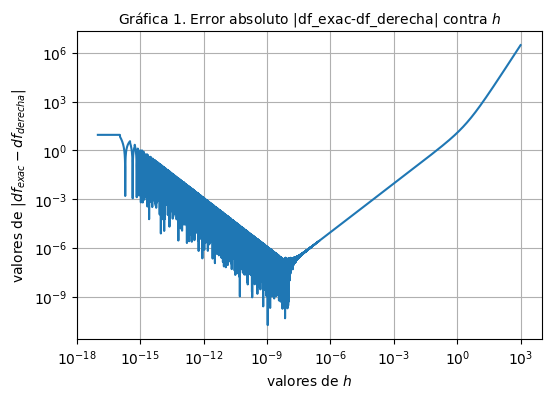

In [8]:
h=logspace(-17, 3, 100000)
n=length(h)
x0=1.0
y=[i=zero(eltype(h)) for i=1:n]

for i in 1:n
    y[i]=abs(df_exac(x0)-df_derecha(f,x0,h[i]))
end

figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(h,y)    # este comando pinta las componentes "y"(el error) ; 
             # en "x" se expresa el tamño de h
           # Los vectores *tienen* que tener el mismo número de elementos
title(L"Gráfica 1. Error absoluto |df_exac-df_derecha| contra $h$", fontsize=10)
xlabel(L"valores de $h$")
ylabel(L"valores de $|df_{exac}-df_{derecha}|$")
grid()
xscale("log")
yscale("log")

*A partir de la gráfica 1, la conclusión es que al tomar valores de $h$ cada vez más pequeños hasta $h=10^{-8}$ el error se hace más pequeño $E\approx10^{-7}$, y después para valores de $h$ más chicos el error aumenta y varia.*

## Ejercicio 2: Derivada simétrica

Repitan el ejercicio anterior usando la aproximación que se basa en la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}

¿Qué pueden concluir respecto a la convergencia? ¿Cómo se compara este algoritmo con el del ejercicio anterior?

In [9]:
"""
 df_simetrica()

Este algoritmo calcula la derivada simétrica de una función, es decir, para un una diferencia h 
adelante del punto \$x_0\$ y otra atras.
"""
function df_simetrica(f, x0, h)
    df=(f(x0+h)-f(x0-h))/(2*h)
    return df
end

df_simetrica

In [10]:
?df_simetrica()

df_simetrica()

Este algoritmo calcula la derivada simétrica de una función, es decir, para un una diferencia h  adelante del punto $x_0$ y otra atras.


In [11]:
df_simetrica(f, 1.0, 0.001)

9.000002999999257

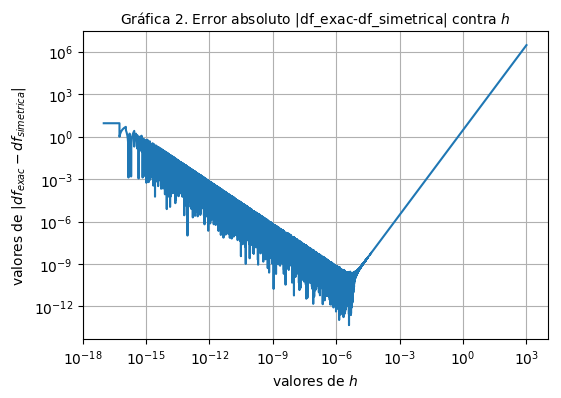

In [12]:
hs=logspace(-17, 3, 100000)
n1=length(hs)
x0=1.0
y1=[i=zero(eltype(h)) for i=1:n1]

for i in 1:n1
    y1[i]=abs(df_exac(x0)-df_simetrica(f,x0,hs[i]))
end

figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(hs,y1)    # este comando pinta las componentes "y"(el error) ; 
             # en "x" se expresa el tamño de h
           # Los vectores *tienen* que tener el mismo número de elementos
title(L"Gráfica 2. Error absoluto |df_exac-df_simetrica| contra $h$", fontsize=10)
xlabel(L"valores de $h$")
ylabel(L"valores de $|df_{exac}-df_{simetrica}|$")
grid()
xscale("log")
yscale("log")

*A partir de la gráfica 2, la conclusión es que al tomar valores de $h$ cada vez más cercanos a $h=10^{-5}$ el error se hace más pequeño $E\approx10^{-9}$, y después para valores de $h$ más chicos el error aumenta y varia.*

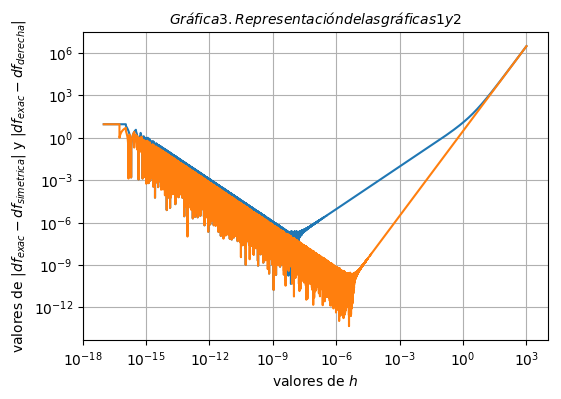

In [13]:
figure(figsize=(6,4))
plot(h,y)
plot(hs,y1)
title(L"Gráfica 3. Representación de las gráficas 1 y 2", fontsize=10)
xlabel(L"valores de $h$")
ylabel(L"valores de $|df_{exac}-df_{simetrica}|$ y $|df_{exac}-df_{derecha}|$")
grid()
xscale("log")
yscale("log")

## Ejercicio 3: Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Esto es, nos basaremos en la definición de la derivada dada por:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


La [derivada compleja](https://en.wikipedia.org/wiki/Complex_analysis) tiene la siguiente expresión

$$f'(z_0)=\lim_{z\rightarrow z_0}\frac{f(z)-f(z_0)}{z-z_0},\hspace{.3cm}z\in\mathbb{C}
\hspace{.3cm}\mbox{con}\hspace{.3cm}z=x+iy$$

**Teorema de Cauchy-Riemann.** *Sea $f:A\subset\mathbb{C}\rightarrow\mathbb{C}$ una función dada, con $A$ un conjunto abierto. Entonces $f'(z_0)$ existe si y sólo si $f$ es diferenciable en el sentido de las variables reales y en $(x_0,y_0)=z_0$, $u$ y $v$ satisfacen*
$$\frac{\partial u}{\partial x}=\frac{\partial v}{\partial y}\hspace{.5cm}\mbox{y}\hspace{.5cm}
\frac{\partial u}{\partial y}=-\frac{\partial v}{\partial x}$$
*(llamadas las **ecuaciones de Cauchy-Riemann**)).*

Si $f'(z_0)$ existe, entonces
$$f'(z_0)=\frac{\partial u}{\partial x}+i\frac{\partial v}{\partial x}=\frac{\partial f}{\partial x}
=\frac{\partial v}{\partial y}-i\frac{\partial u}{\partial y}
=\frac{1}{i}\frac{\partial f}{\partial y}$$

In [14]:
"""
 df_complejaderecha()

Este algoritmo calcula la derivada compleja por la derecha de una función para un una diferencia 
h dada en el punto \$z_0\$.
"""
function df_complex(f,x0,h)
    df=imag(f(x0+im*h)/h)
    return df
end

df_complex

In [15]:
df_complex(f,1.0,1e-12)

9.000000000000002

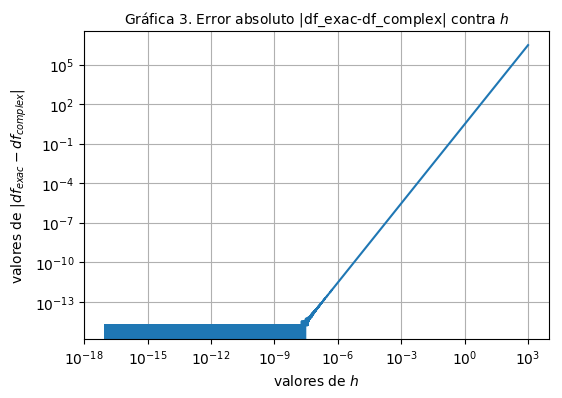

In [16]:
hc=logspace(-17, 3, 100000)
n2=length(hs)
x0=1.0
y2=[i=zero(eltype(h)) for i=1:n2]

for i in 1:n2
    y2[i]=abs(df_exac(x0)-df_complex(f,x0,hs[i]))
end

figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(hc,y2)    # este comando pinta las componentes "y"(el error) ; 
             # en "x" se expresa el tamño de h
           # Los vectores *tienen* que tener el mismo número de elementos
title(L"Gráfica 3. Error absoluto |df_exac-df_complex| contra $h$", fontsize=10)
xlabel(L"valores de $h$")
ylabel(L"valores de $|df_{exac}-df_{complex}|$")
grid()
xscale("log")
yscale("log")

*A partir de la gráfica 3, la conclusión es que al tomar valores de $h$ cada vez más cercanos a $h=10^{-7}$ el error se hace más pequeño $E\approx10^{-15}$, y después para valores de $h$ más chicos el error se queda constante.*

In [17]:
"""
 df_complejaderecha()

Este algoritmo calcula la derivada compleja por la derecha de una función para un una diferencia 
h dada en el punto \$z_0\$.
"""
function df_compleja(fc,z0,h)
    df=(fc(x+im*y)-fc(x0+im*y0))/(x+im*y-x0-im*y0)
    return df
end

df_compleja

In [18]:
"""
 df_complejaderecha()

Este algoritmo calcula la derivada compleja por la derecha de una función para un una diferencia 
h dada en el punto \$z_0\$.
"""
function df_complejaderecha(u,v,x0,y0,h)
    du=df_simetrica(u, x0, h)
    dv=df_simetrica(v, x0, h)
    return du+im*dv
end

df_complejaderecha

Si $f(z)=z^2$ entonces $f'(z)=2z$ 

$$f(z)=(x+iy)^2=x^2-y^2+2ixy=(x^2-y^2)+i(2xy)\hspace{2cm}f'(z)=2z=2(x+iy)$$

In [19]:
u(x)=x^2#u(x,y)=x^2-y^2 como la derivo con respecto a x (y=cte)
v(x)=2x*y0#v(x,y)=2xy como la derivo con respecto a y (x=cte)

v (generic function with 1 method)

In [20]:
df_complejaderecha(u,v,1.0,1.0,.01)

LoadError: UndefVarError: y0 not defined

In [21]:
sqrt(complex(-1+1.0*im))

0.45508986056222733 + 1.09868411346781im

In [22]:
df_derecha(u,1.0+1.0*im,.1)

2.100000000000002 + 2.0000000000000018im

## Ejercicio 4: Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

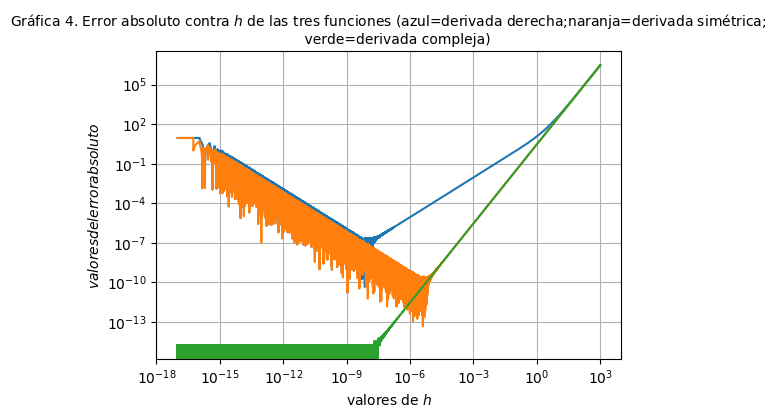

In [23]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(h,y)
plot(hs,y1)
plot(hc,y2)    # este comando pinta las componentes "y"(el error) ; 
             # en "x" se expresa el tamño de h
           # Los vectores *tienen* que tener el mismo número de elementos
title(L"Gráfica 4. Error absoluto contra $h$ de las tres funciones (azul=derivada derecha;naranja=derivada simétrica; 
    verde=derivada compleja)", fontsize=10)
xlabel(L"valores de $h$")
ylabel(L"valores del error absoluto")
grid()
xscale("log")
yscale("log")

Como observamos en la gráfica 4, el mejor método para calcular la derivada de una función es el de derivada compleja que nos da un error de aproximadamente $E\approx10^{-15}$. El peor de todos es el de derivada derecha que tiene un error de $E\approx10^{-6}$. Finalmente los métodos de derivada derecha y simétrica aumenta el error a partir de un determinado valor de $h$ por lo que no se puede mejorar la exactitud de éstos métodos disminuyendo el intervalo $h$.

**Serie de Taylor**
$$f(x+h)=f(x)+hf'(x)+\frac{h^2}{2!}f''(x)+\frac{h^3}{3!}f'''(x)+\cdots$$

**Serie de Taylor para la derivada derecha**
$$\frac{f(x+h)-f(x)}{h}=\frac{f(x)+hf'(x)+\frac{h^2}{2!}f''(x)+\frac{h^3}{3!}f'''(x)+\cdots-f(x)}{h}
=f'(x)+O(h)$$
Converge linealmente en $h$.

**Serie de Taylor para la derivada simétrica**
$$\frac{f(x+h)-f(x-h)}{2h}=\frac{f(x)+hf'(x)+\frac{h^2}{2!}f''(x)+\frac{h^3}{3!}f'''(x)+\cdots-
\left(f(x)-hf'(x)+\frac{h^2}{2!}f''(x)-\frac{h^3}{3!}f'''(x)+\cdots\right)}{2h}
=f'(x)+O(h^2)$$
Converge cuadráticamente en $h$.

**Serie de Taylor para la derivada compleja**
$$\frac{f(x+ih)-f(x)}{h}=\frac{f(x)+ihf'(x)+\frac{(ih)^2}{2!}f''(x)+\frac{(ih)^3}{3!}f'''(x)+\cdots-
f(x)}{h}$$
Tomo solamente la parte imaginaria entonces
$$\frac{f(x+ih)-f(x)}{h}\approx\frac{hf'(x)-\frac{h^3}{3!}f'''(x)+\cdots}{h}=f'(x)+O(h^2)$$
Converge cuadráticamente en $h$.

A partir de estas series de Taylor observamos que la de la función compleja tiene un error del orden de $O(h^2)$, por lo cual es más exacta que las otras.

- ¿Qué comportamiento mostrado por las derivadas en términos de $h$ nos incomoda más? ¿A qué atribuyen esto?

Nos incomoda más la derivada por la derecha ya que la función converge linealmente y se presentan errores de calculo para valores de $h$ más grandes que en los otros métodos.